In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import numpy as np
import pandas as pd

##

In [ ]:
X=[]
Y=[]
lines=[]

data_path='/content/drive/My Drive/Self-driving-car-dataset/'
#path='C://Users//HP//Desktop//ML//Self-Driving-Car//driving_dataset//'

images_path='/content/drive/My Drive/Self-driving-car-dataset/images/'
#path='C://Users//HP//Desktop//ML//Self-Driving-Car//driving_dataset//'

with open(data_path+'data.txt') as file:
    lines=file.readlines()


for line in lines:
    w=line.split()
    X.append(w[0])
    Y.append(float(w[1]))
        

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Self-driving-car-dataset/data.txt'

In [ ]:
import os
cnt=0
for i,x in enumerate(X):
    X[i]=images_path+X[i]
    if os.path.isfile(X[i]):
        cnt+=1
    else:
        print(x[i])
    
print(cnt)

'C://Users//HP//Desktop//ML//Self-Driving-Car//driving_dataset//4.jpg'

In [ ]:
import math

for i,y in enumerate(Y):
    Y[i]=(y*math.pi)/180
    
print(Y[89])

0.024609142453120045


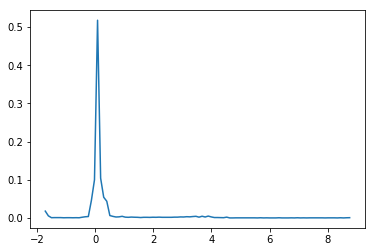

In [ ]:
import matplotlib.pyplot as plt

counts,bin_edges=np.histogram(Y,bins=100,density=True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.show()

In [ ]:
import keras
import cv2

class Generator(keras.utils.Sequence):
    
    def __init__(self,X,Y,batch_size):
        self.X=X
        self.Y=Y
        self.batch_size=batch_size
        
    def __len__(self):
        return int(np.ceil(len(self.X)/batch_size))
    
    def __getitem__(self,idx):
        batch_x=self.X[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y=self.Y[idx*self.batch_size : (idx+1)*self.batch_size]
        
        x_vec=[]
        for img in batch_x:
            x_vec.append(cv2.imread(img))
            
        return np.array(x_vec)/255,np.array(batch_y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,BatchNormalization
from keras.layers.convolutional import Conv2D,MaxPooling2D

width=256
height=455
channels=3
batch_size=32
epochs=10
model=Sequential()

#Conv Layer-1
model.add(Conv2D(24,kernel_size=5,strides=2,input_shape=(width,height,channels),
                 data_format='channels_last',activation='relu'))
model.add(BatchNormalization())

#Conv Layer-2
model.add(Conv2D(36,kernel_size=5,strides=2,activation='relu'))
model.add(BatchNormalization())

#Conv Layer-3
model.add(Conv2D(48,kernel_size=5,strides=2,activation='relu'))
model.add(BatchNormalization())

#Conv Layer-4
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())

#Conv Layer-5
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())

#Flattening
model.add(Flatten())

#Fully Connected Layer-1
model.add(Dense(1164))

#Fully Connected Layer-2
model.add(Dense(200))

#Fully Connected Layer-3
model.add(Dense(50))

#Fully Connected Layer-4
model.add(Dense(10))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))



In [ ]:
# Compile the network :
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 226, 24)      1824      
_________________________________________________________________
batch_normalization_6 (Batch (None, 126, 226, 24)      96        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 111, 36)       21636     
_________________________________________________________________
batch_normalization_7 (Batch (None, 61, 111, 36)       144       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 54, 48)        43248     
_________________________________________________________________
batch_normalization_8 (Batch (None, 29, 54, 48)        192       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 27, 52, 64)       

In [ ]:
split=int(.8*len(X))
X_train=X[0:split]
X_val=X[split:]
Y_train=Y[0:split]
Y_val=Y[split:]

print("train:",len(X_train),len(Y_train))
print("val:",len(X_val),len(Y_val))

train: 8 8
val: 2 2


In [ ]:
from sklearn.metrics import mean_squared_error

z=[0]*len(Y_val)
mean_squared_error(Y_val, z)

0.6890314625042

In [ ]:
training_batch_generator =Generator(X_train, Y_train, batch_size)
validation_batch_generator =Generator(X_val, Y_val, batch_size)

model.fit(training_batch_generator,
            steps_per_epoch=int(len(X_train)//batch_size),
            epochs = epochs,
            verbose=1,
            workers=100,
            validation_data=validation_batch_generator,
            validation_steps=int(len(X_val)//batch_size))

Epoch 1/10
25/25 [==============================] - 207s 8s/step - loss: 102.3934 - mean_absolute_error: 102.3934 - val_loss: 2.9908 - val_mean_absolute_error: 2.9908
Epoch 2/10
25/25 [==============================] - 204s 8s/step - loss: 0.9069 - mean_absolute_error: 0.9069 - val_loss: 2.1242 - val_mean_absolute_error: 2.1242
Epoch 3/10
25/25 [==============================] - 205s 8s/step - loss: 0.8217 - mean_absolute_error: 0.8217 - val_loss: 1.9882 - val_mean_absolute_error: 1.9882
Epoch 4/10
25/25 [==============================] - 204s 8s/step - loss: 0.7702 - mean_absolute_error: 0.7702 - val_loss: 1.9801 - val_mean_absolute_error: 1.9801
Epoch 5/10
25/25 [==============================] - 204s 8s/step - loss: 0.7527 - mean_absolute_error: 0.7527 - val_loss: 1.8902 - val_mean_absolute_error: 1.8902
Epoch 6/10
25/25 [==============================] - 202s 8s/step - loss: 0.7723 - mean_absolute_error: 0.7723 - val_loss: 2.0307 - val_mean_absolute_error: 2.0307
Epoch 7/10
25/25 [

In [ ]:
model.save('m1.h5')
# from keras.models import load_model 
# model = load_model("m1.h5") 